<a href="https://colab.research.google.com/github/ktabata117/classmaterial_public/blob/master/aidai_2_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第3回授業

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 2.9MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=f0b531dcc240c93149398cb6563971a967c3ea7bd0e405d9736cd350e3f10881
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


# グラフに日本語フォントで出力するには

一番簡単なのは，japanize-matplotlib を使う方法です．

### インストール

~~~ 
!pip install japanize-matplotlib
~~~

### 使い方

~~~
import matplotlib.pyplot as plt
import japanize_matplotlib 
~~~

pip インストールは japanize-matplotlib とハイフンなのに，import はアンダースコアであることに注意


In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib 

*でわ、散布図を書いてみよう。*

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
soukan=pd.read_csv('/content/sample_data/soukan.csv')
soukan

,社員番号,給料,残業時間
0,1,30,22
1,2,26,15
2,3,40,26
3,4,28,12
4,5,26,9
5,6,35,20
6,7,20,15
7,8,60,30
8,9,15,13
9,10,20,8


# 新しいセクション

In [ ]:
pay =np.array(soukan['給料'])
zangyou= np.array(soukan['残業時間'])

In [ ]:
pay

array([30, 26, 40, 28, 26, 35, 20, 60, 15, 20])

In [ ]:
zangyou

array([22, 15, 26, 12,  9, 20, 15, 30, 13,  8])

図を書くライブラリーはmatplotlib

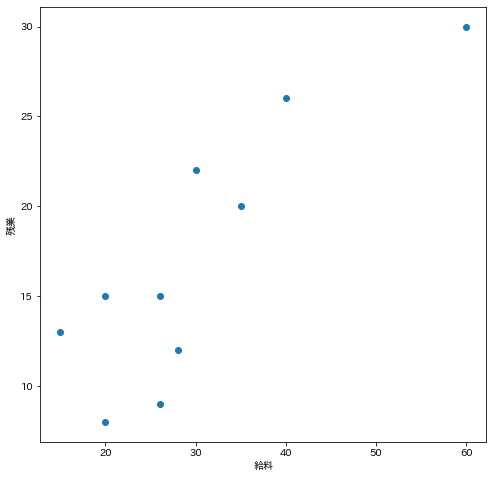

In [ ]:
fig =plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(pay,zangyou)
ax.set_xlabel('給料')
ax.set_ylabel('残業')
plt.show()

文字化けしている。今の所、修正方法分からない。仕方ないので、英語表記

In [ ]:
fig =plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(pay,zangyou)
ax.set_xlabel('PAY')
ax.set_ylabel('overwork_hours')
plt.show()

NameError: ignored

相関係数を求めてみる。相関係数について注意すること。原因と結果を示しているわけではない。


In [ ]:
np.corrcoef(pay, zangyou)

array([[1.        , 0.84836489],
       [0.84836489, 1.        ]])

In [ ]:
k_i=pd.read_csv('/content/sample_data/kion_ice.csv')
k_i

,月,気温,アイスクリーム
0,1,10.6,464
1,2,12.2,397
2,3,14.9,493
3,4,20.3,617
4,5,25.2,890
5,6,26.3,883
6,7,29.7,1292
7,8,31.6,1387
8,9,27.7,843
9,10,22.6,621


In [ ]:
x=np.array(k_i['気温'])
y=np.array(k_i['アイスクリーム'])

NameError: ignored

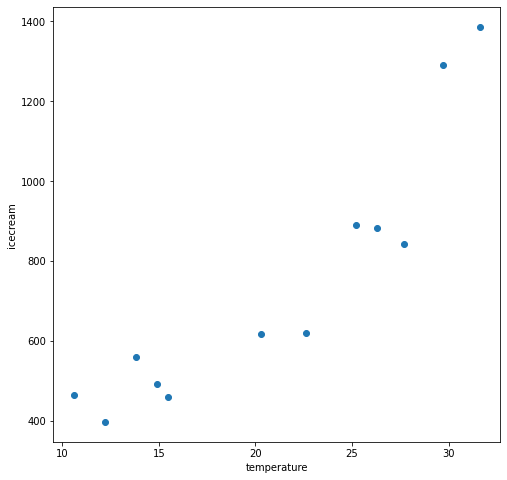

In [ ]:
fig =plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.set_xlabel('temperature')
ax.set_ylabel('icecream')
plt.show()

ここで議論を、飛躍というか、第一の最終段階に。最小二乗法を実施してみましょう。Ordinary Least Squares

In [ ]:
import statsmodels.api as sm

In [ ]:
model =sm.OLS(y,sm.add_constant(x))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     48.46
Date:                Mon, 10 May 2021   Prob (F-statistic):           3.89e-05
Time:                        15:37:09   Log-Likelihood:                -75.369
No. Observations:                  12   AIC:                             154.7
Df Residuals:                      10   BIC:                             155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -107.0571    128.673     -0.832      0.4

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [ ]:
model = sm.ols(formula=reg, data=k_i)

In [ ]:
result = model.fit()
result

第一回　社会データ分析　オンディマンド大会

まず、ライブラリをインストールしますね。NUMPYとpandas そして重回帰用のstatsmodels.apiです。

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
emerg=pd.read_csv('/content/sample_data/2021data_regres1.csv')
emerg.head()

,時点,完全失業,人口,救急車回数
0,1975年,100,111251507,1537762
1,1976年,108,112447000,1601045
2,1977年,110,113514000,1710722
3,1978年,124,114534000,1783458
4,1979年,117,115496000,1869163


In [ ]:
x0=np.array(emerg['人口'])

In [ ]:
lx0=np.log(x0)

In [ ]:
x1 = np.array(emerg['完全失業'])

In [ ]:
lx1=np.log(x1)

このやり方しか思いつきませんした

In [ ]:
from pandas import Series, DataFrame

In [ ]:
locというコマンドを使います。

In [ ]:
x3= emerg.loc[:,['完全失業','人口']]

In [ ]:
lx3=np.log(x3)

In [ ]:
lx3

,完全失業,人口
0,4.605170,18.527304
1,4.682131,18.537993
2,4.700480,18.547437
3,4.820282,18.556382
4,4.762174,18.564746
5,4.736198,18.571859
6,4.836282,18.579580
7,4.912655,18.586560
8,5.049856,18.593280
9,5.081404,18.599605


In [ ]:
Y=np.array(emerg['救急車回数'])

In [ ]:
ly=np.log(Y)

In [ ]:
model =sm.OLS(ly,sm.add_constant(lx3))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     73.81
Date:                Mon, 17 May 2021   Prob (F-statistic):           2.59e-14
Time:                        05:53:03   Log-Likelihood:                 7.1882
No. Observations:                  44   AIC:                            -8.376
Df Residuals:                      41   BIC:                            -3.024
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -142.1012     32.181     -4.416      0.0

In [ ]:
columns = ['人口', '失業者']

もう一つの方法

In [ ]:
a=pd.Series(lx0,lx1)
print(a)


4.605170    18.527304
4.682131    18.537993
4.700480    18.547437
4.820282    18.556382
4.762174    18.564746
4.736198    18.571859
4.836282    18.579580
4.912655    18.586560
5.049856    18.593280
5.081404    18.599605
5.049856    18.605395
5.117994    18.610631
5.153292    18.615277
5.043425    18.619097
4.955827    18.622445
4.897840    18.622792
4.912655    18.628694
4.955827    18.631881
5.111988    18.634557
5.257495    18.636993
5.347108    18.638200
5.416100    18.641486
5.438079    18.643512
5.631212    18.645806
5.758902    18.647234
5.768321    18.646913
5.828946    18.651237
5.883322    18.652213
5.857933    18.653426
5.746203    18.653901
5.683580    18.649648
5.616771    18.654060
5.549076    18.654543
5.579730    18.654487
5.817111    18.654511
5.811141    18.646691
5.710427    18.653458
5.652489    18.651975
5.579730    18.650228
5.463832    18.648310
5.402677    18.638079
5.337538    18.643984
5.247024    18.641004
5.111988    18.637549
dtype: float64


In [ ]:
x4=pd.DataFrame({'対数人口':lx0,'対数失業':lx1})
x4


,対数人口,対数失業
0,18.527304,4.605170
1,18.537993,4.682131
2,18.547437,4.700480
3,18.556382,4.820282
4,18.564746,4.762174
5,18.571859,4.736198
6,18.579580,4.836282
7,18.586560,4.912655
8,18.593280,5.049856
9,18.599605,5.081404


In [ ]:
model =sm.OLS(ly,sm.add_constant(x4))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     73.81
Date:                Mon, 17 May 2021   Prob (F-statistic):           2.59e-14
Time:                        05:58:44   Log-Likelihood:                 7.1882
No. Observations:                  44   AIC:                            -8.376
Df Residuals:                      41   BIC:                            -3.024
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -142.1012     32.181     -4.416      0.0

# ***主成分分析***

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


主成分分析（PCA）を利用するためのライブラリーは。sklearnです。ここのPCAを呼び出します。
Preprocesssing は、データを標準化しています。そもそものデータから平均を差し引き、それを標準偏差で割るというような作業が基準化、標準化と呼ばれるものです。こうしないと、そもそも、試験問題の難しさによって成績が、科目ごとに違う場合などに影響が出てしまします。
標準化には、この他にも、成績の場合には偏差値などもあるとは思います。


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
pca1=pd.read_csv('/content/sample_data/seiseki.csv')
pca1.head()

,学籍番号,国語,社会,数学,理科,英語
0,1,42,49,42,35,48
1,2,42,52,43,49,46
2,3,41,39,42,39,43
3,4,77,61,48,48,67
4,5,40,38,45,49,34


In [ ]:
pca2= pca1.loc[:,['国語','社会','数学','理科','英語']]
pca2.head()

,国語,社会,数学,理科,英語
0,42,49,42,35,48
1,42,52,43,49,46
2,41,39,42,39,43
3,77,61,48,48,67
4,40,38,45,49,34


データの標準化

In [ ]:
pca2_s=scale(pca2)
pca2_s

array([[-0.37846082,  0.38199339, -0.85726402, -1.27310383,  0.00418747],
       [-0.37846082,  0.73642025, -0.70686683,  0.2589982 , -0.24706097],
       [-0.48262434, -0.79942947, -0.85726402, -0.83536039, -0.62393362],
       [ 3.26726263,  1.79970083,  0.04511916,  0.14956234,  2.39104764],
       [-0.58678787, -0.91757176, -0.40607243,  0.2589982 , -1.7545516 ],
       [ 0.66317446,  0.14570882,  2.00028272,  2.11940781, -0.24706097],
       [-0.17013376, -1.50828319,  0.19551636, -2.91464172, -2.3826727 ],
       [-0.06597023, -0.79942947,  0.04511916, -0.06930938, -0.37268518],
       [ 1.18399209,  0.02756653,  0.94750234, -0.06930938, -0.74955784],
       [-0.06597023,  0.61827797,  0.79710514, -0.06930938,  0.63230857],
       [-1.10760551,  0.26385111, -0.40607243,  0.58730578, -0.24706097],
       [-1.21176903,  0.14570882, -0.40607243, -0.06930938,  0.00418747],
       [ 1.70480973,  1.56341626,  1.69948833,  0.14956234,  0.75793279],
       [ 0.35068387,  1.09084711,  1.3

主成分分析の実行
実行した結果を、resultという名前で記録させる。

In [ ]:
pca=PCA()
pca.fit(pca2_s)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**太字**ここで、空白などを入れると動かないので注意

print('主成分', pca.components_.round(4))、一見よさそうですが、
'主成分',空白pca.components_round(4)) だと動かない。

---



In [ ]:
print('主成分',pca.components_.round(2))  
print('平均',pca.mean_) 
print('共分散', pca.get_covariance())   

主成分 [[ 0.39  0.45  0.45  0.41  0.52]
 [-0.61 -0.33  0.31  0.65 -0.04]
 [ 0.35 -0.3   0.72 -0.2  -0.48]
 [ 0.45 -0.76 -0.23  0.17  0.38]
 [ 0.39  0.17 -0.35  0.58 -0.6 ]]
平均 [ 7.40148683e-17  1.36927506e-16 -3.92278802e-16  5.92118946e-17
 -2.07241631e-16]
共分散 [[1.03448276 0.38634136 0.29640968 0.05973456 0.43661824]
 [0.38634136 1.03448276 0.32773265 0.22533617 0.47173897]
 [0.29640968 0.32773265 1.03448276 0.4748661  0.3411911 ]
 [0.05973456 0.22533617 0.4748661  1.03448276 0.48242117]
 [0.43661824 0.47173897 0.3411911  0.48242117 1.03448276]]


In [ ]:
# 寄与率
print('寄与率', pca.explained_variance_ratio_)
print('累積寄与率', np.cumsum(pca.explained_variance_ratio_).round(4))
print('標準偏差', [math.sqrt(u) for u in pca.explained_variance_])

寄与率 [0.47441876 0.20462389 0.13328661 0.11974649 0.06792424]
累積寄与率 [0.4744 0.679  0.8123 0.9321 1.    ]
標準偏差 [1.5664897504387156, 1.0287854219408723, 0.8303092913573383, 0.7870059735861311, 0.5927328982781863]


結果を見やすくするために、少し高度なことを

In [ ]:
feature = pca.transform(pca2_s)

In [ ]:
result=pd.DataFrame(feature, index=['生徒{}'.format(xx+1) for xx in range(0,30)],columns=["PC{}".format(x + 1) for x in range(0,5)])

In [ ]:
result

,PC1,PC2,PC3,PC4,PC5
生徒1,-0.888267,-0.987770,-0.618164,-0.481907,-0.515554
生徒2,-0.156579,-0.047913,-0.793852,-0.613247,0.529379
生徒3,-1.604560,-0.226310,-0.090636,0.206633,-0.131503
生徒4,3.417245,-2.569956,-0.536903,1.018588,0.217753
生徒5,-1.629077,0.775651,0.561307,-0.088647,0.958245
生徒6,1.975803,1.555088,1.339740,0.003097,0.947671
生徒7,-3.102432,-1.143023,2.238405,-0.378821,-0.654837
生徒8,-0.587037,0.285869,0.437783,0.413737,0.002870
生徒9,0.485895,-0.453324,1.461627,0.000409,0.537631
生徒10,0.909587,0.011404,0.083217,-0.456213,-0.619743


In [ ]:
result=pd.DataFrame(feature)
result

,0,1,2,3,4
0,-0.888267,-0.987770,-0.618164,-0.481907,-0.515554
1,-0.156579,-0.047913,-0.793852,-0.613247,0.529379
2,-1.604560,-0.226310,-0.090636,0.206633,-0.131503
3,3.417245,-2.569956,-0.536903,1.018588,0.217753
4,-1.629077,0.775651,0.561307,-0.088647,0.958245
5,1.975803,1.555088,1.339740,0.003097,0.947671
6,-3.102432,-1.143023,2.238405,-0.378821,-0.654837
7,-0.587037,0.285869,0.437783,0.413737,0.002870
8,0.485895,-0.453324,1.461627,0.000409,0.537631
9,0.909587,0.011404,0.083217,-0.456213,-0.619743


In [ ]:
result=pd.DataFrame(feature, index=['学生{}'.format(xx+1) for xx in range(0,30)],columns=["PC{}".format(x + 1) for x in range(0,5)])

In [ ]:
X=np.array(result['PC1'])
Y=np.array(result['PC2'])

In [ ]:
annotations=['std{}'.format(xx+1) for xx in range(0,30)]

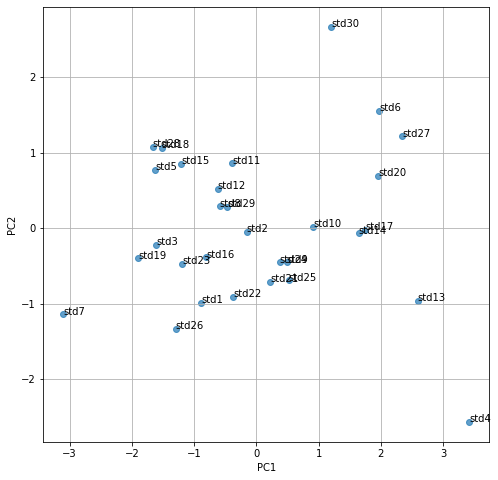

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(X, Y, alpha=0.7 )
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
for i, label in enumerate(annotations):
   plt.annotate(label, (X[i], Y[i]))
plt.show()

主成分として抽出したFACTOR１とFACTOR２が、学生１～30までにどのように採用しているのか、その大きさ（負荷）を計算するというやっかいな作業があります。この説明は、我々のレベルを超えております。ですので、おまじないBOXで計算したものとして出力できるようだけしておきます。第一ステップは、分からない所を気にしないこともコツです。
国語	社会	数学	理科	英語 の負荷を計算します。

In [ ]:
u = pd.DataFrame([ [math.sqrt(u) for u in pca.explained_variance_] ] * 9)
u0 = u[0][0]
pca_components = pd.DataFrame(pca.components_)
x = pca.components_[0, :] * u0
y = pca.components_[1, :] * u0
fuka = (np.array([x, y])).T
print('負荷\n', fuka.round(4))

負荷
 [[ 0.6161 -0.9553]
 [ 0.7037 -0.5119]
 [ 0.704   0.4816]
 [ 0.6496  1.0213]
 [ 0.8134 -0.066 ]]


補足　繰り返し計算
同じ仕事を繰り返す。

In [ ]:
for hensuu in range(3):
#この下に繰り返したいものを書く
  print(hensuu,'回')
#　（プログラム上の話　FOR文などどでは、） タブKEYというのが必要なんですね。  

0 回
1 回
2 回


In [ ]:
for hensuu in range(0,5):
#この下に繰り返したいものを書く
  print(hensuu,'回')

0 回
1 回
2 回
3 回
4 回


**Kmeans法**
主成分分析と似たような感じですが、グループを分ける、クラスタリングするための一つの方法です。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
pca1=pd.read_csv('/content/sample_data/seiseki.csv')
pca1.head()

,学籍番号,国語,社会,数学,理科,英語
0,1,42,49,42,35,48
1,2,42,52,43,49,46
2,3,41,39,42,39,43
3,4,77,61,48,48,67
4,5,40,38,45,49,34


In [ ]:
pca2= pca1.loc[:,['国語','理科','英語','数学','社会']]
pca2.head()

,国語,理科,英語,数学,社会
0,42,35,48,42,49
1,42,49,46,43,52
2,41,39,43,42,39
3,77,48,67,48,61
4,40,49,34,45,38


In [ ]:
pca2_new = pca2.rename(columns={'国語':'kokugo','理科':'science','英語':'Eng','数学':'Math','社会':'syakai'})
pca2_new.head()

,kokugo,science,Eng,Math,syakai
0,42,35,48,42,49
1,42,49,46,43,52
2,41,39,43,42,39
3,77,48,67,48,61
4,40,49,34,45,38


In [ ]:
kmeans =KMeans(n_clusters=3).fit(pca2)


In [ ]:
label=kmeans.labels_
label

array([1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1,
       1, 2, 2, 1, 0, 1, 1, 0], dtype=int32)

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF'}

In [ ]:
colors = [color_codes[x] for x in label]

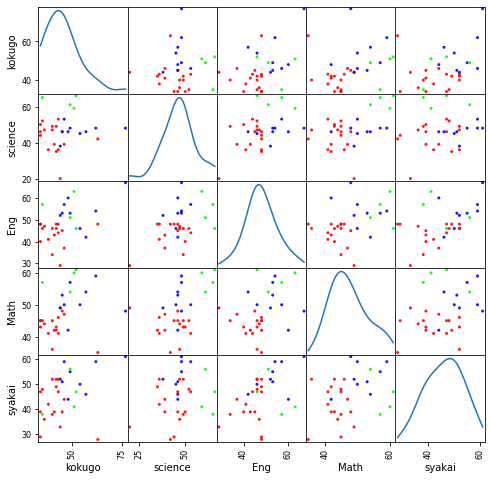

In [ ]:
#全体像を眺める
scatter_matrix(pca2_new[pca2_new.columns[0:]], figsize=(8,8), color=colors, alpha=0.9, diagonal='kde')  
plt.show()

それじゃ、３つのグループに分けたKMEANSの分析と、主成分分析をドッキングしてみます。このクラスを3つのグループに分けるとすれば、以下のような集団になるということですね。

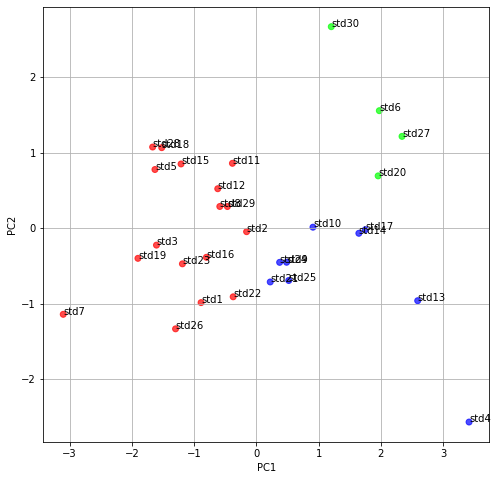

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(X, Y, alpha=0.7,color=colors )
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
for i, label in enumerate(annotations):    
      plt.annotate(label, (X[i], Y[i]))
plt.show()

# 新しいセクション

nework分析

In [20]:
import pandas as pd

In [4]:
runesu=pd.read_csv('/content/sample_data/florentine.csv')
runesu.head()


,FAMILY,ACCIAIUOL,ALBIZZI,BARBADORI,BISCHERI,CASTELLAN,GINORI,GUADAGNI,LAMBERTES,MEDICI,PAZZI,PERUZZI,PUCCI,RIDOLFI,SALVIATI,STROZZI,TORNABUON
0,ACCIAIUOL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,ALBIZZI,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,BARBADORI,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,BISCHERI,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,CASTELLAN,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [21]:
import networkx as nx 

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

In [24]:
G = nx.Graph()

In [25]:
nod=range(0,15)
e= [(3,5), (4,5), (5,10),(5,11),(5,13), (5,6) ] # list of edges
G.add_nodes_from(nod)
G = nx.Graph(e)
e1=[(0,1),(0,2), (0,4),(1,4), (1,7),(1,2), (2,3),(3,6),(11,12), (13,14),(6,8),(8,13), (8,9),(13,14)]
G.add_edges_from(e1)

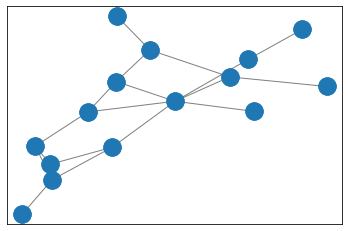

In [43]:
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)

In [41]:
labels={}
labels[0]= 'Castellan'
labels[1]='Peruzzi'
labels[2]='Strozzi'
labels[3]='Ridolfi'
labels[4]='Barbadori'
labels[5]='Medici'
labels[6]='Tornabuorn'
labels[7]='Bischeri'
labels[8]='Guadagni'
labels[9]='Lambertertes'
labels[10]= 'Acciaiuol'
labels[11]='Salviati'
labels[12]='Pazzi'
labels[13]='Albizzi'
labels[14]='Ginori'

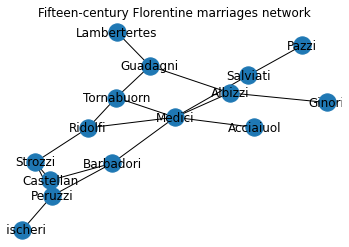

In [46]:
nx.draw_networkx_labels(G,pos,labels)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=1.0)

plt.axis('off')
plt.title('Fifteen-century Florentine marriages network')    
plt.show() 